# Goal:

* What is the impact of each marketing strategy and sales visit on Sales(Amount collected)?


## 2. Data loading & quality

In [78]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [5]:
# Loading the dataset
data=pd.read_csv(r"C:\Users\Admin\Desktop\Projects\Marketing Analytics Projects\Marketing Campaign analysis\Campaign-Data.csv")

In [6]:
data

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,ID-987463,Small Facility,800,20,1003,16-08-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2972,ID-987463,Small Facility,800,20,1003,16-09-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High
2973,ID-987463,Small Facility,800,20,1003,16-10-2015,0,0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,0.0,High
2974,ID-987463,Small Facility,800,20,1003,16-11-2015,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High


## 3. Feature Additons and Engineering

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

Calendardate is of object type. We'll covert it to datetime type

In [8]:
data['Calendardate'] = pd.to_datetime(data['Calendardate'])

# Created two new columns Calendar Month and Calendar Year
data['Calendar_Month'] = data['Calendardate'].dt.month
data['Calendar_Year'] =data['Calendardate'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_9268\2859696421.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Calendardate'] = pd.to_datetime(data['Calendardate'])


In [9]:
data.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


## 4. EDA and Statistical Analysis

### Exploring and Understanding data
1. Finding missing and null values
2. Distribution of data across different accounts
3. Difference of Sales in Account Types(using categorical mean)

In [10]:
#Total no. of elements in a dataset
data.size

56544

In [11]:
# Data type of each column
data.dtypes

Client ID                        object
Client Type                      object
Number of Customers               int64
Montly Target                     int64
Zip Code                          int64
Calendardate             datetime64[ns]
Amount Collected                  int64
Unit Sold                         int64
Campaign (Email)                float64
Campaign (Flyer)                float64
Campaign (Phone)                float64
Sales Contact 1                 float64
Sales Contact 2                 float64
Sales Contact 3                 float64
Sales Contact 4                 float64
Sales Contact 5                 float64
Number of Competition            object
Calendar_Month                    int32
Calendar_Year                     int32
dtype: object

### Finding & handling null values

In [12]:

data.isnull()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Count of total null values in each column
data.isnull().sum()

Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
Calendar_Month           0
Calendar_Year            0
dtype: int64

No Missing data or null values

### Finding duplicate values

In [14]:
data[data.duplicated()]

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year


No duplicate data found

#### Distinct client types

In [15]:
data.head(2)

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014


In [16]:
data['Client Type'].unique()

array(['Medium Facility', 'Large Facility ', 'Small Facility ',
       'Private Facility'], dtype=object)

In [17]:
data['Client Type'].nunique()

4

#### Understanding the distribution

In [18]:
data['Client Type'].value_counts()

Client Type
Large Facility      1368
Small Facility       840
Medium Facility      504
Private Facility     264
Name: count, dtype: int64

In [19]:
# Normalizing the counts using the relative frequency
relative_frequencies = data['Client Type'].value_counts(normalize=True)
relative_frequencies

Client Type
Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: proportion, dtype: float64

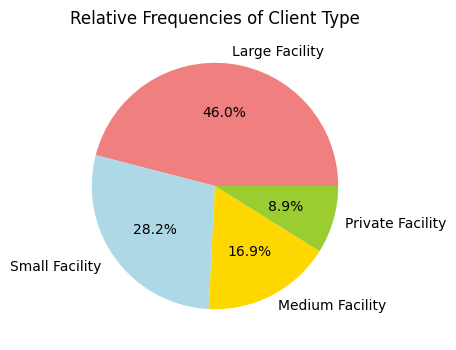

In [20]:
plt.figure(figsize=(4,4))
plt.pie(relative_frequencies, labels=relative_frequencies.index, colors = ['lightcoral', 'lightblue', 'gold', 'yellowgreen'], autopct = '%1.1f%%' )
plt.title('Relative Frequencies of Client Type')
plt.show()

The above relative frequencies of each Cleint Type shows that Large Facilty has the largest number of customer base followed by Smaller facilty

#### _Statistical Analysis of Categorical data_ (mutually exclusive to each other) 

[Number of Competition - High & Low] and\
[Client Type - Medium Facility', 'Large Facility ', 'Small Facility ', 'Private Facility] 

##### Using Cross Tabulation
Cross-tabulation, also known as cross-tab or contingency table, is a statistical tool used for categorical data. Categorical data involves values that are mutually exclusive to each other. Data is always collected in numbers, but numbers have no value unless they mean something. 4,7,9 are merely numerical unless specified—for example, 4 apples, 7 bananas, and 9 kiwis.

Researchers use cross-tabulation to examine the relationship within the data that is not readily evident. It is quite useful in market research studies and surveys. A cross-tab report shows the connection between two or more questions asked in the study.

In [21]:
'''
Here, normalize='columns' normalizes the table along the columns. 
It calculates the proportions of each cell value relative to the total count of values in each column. 
This means that each column will sum up to 1, showing the distribution of each Client Type category within each Number of Competition category.
'''
pd.crosstab(data['Number of Competition'], data['Client Type'], margins = True, normalize='columns') 



Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


The percentages under each 'Number of Competition' category are quite consistent across different client types. This suggests a similar pattern of competition distribution regardless of the client type.\
There are no extreme imbalances in the distribution, indicating that the competition levels are somewhat evenly spread across different types of clients.

#### Understading the statistic based on individual categories

In [22]:
data.head(2)

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014


In [23]:
data.groupby('Number of Competition')[['Number of Customers','Montly Target', 'Amount Collected', 'Unit Sold']].mean()

,Number of Customers,Montly Target,Amount Collected,Unit Sold
Number of Competition,,,,
High,1456.935484,75.080645,2.974789e+07,213.127016
Low,1456.935484,75.080645,1.445570e+07,103.132258


Despite majority of our market is low competition most of our sales coming from High competition, Amount Collected & Unit sold for High competition market is twice more than the Low competition market yielded

In [24]:
data.groupby('Client Type')[['Number of Customers','Montly Target', 'Amount Collected', 'Unit Sold']].mean()

,Number of Customers,Montly Target,Amount Collected,Unit Sold
Client Type,,,,
Large Facility,1380.842105,71.578947,1.999880e+07,143.098684
Medium Facility,3940.761905,202.857143,4.075997e+07,290.583333
Private Facility,400.727273,20.454545,5.030246e+06,35.784091
Small Facility,422.514286,21.285714,1.637759e+06,11.689286


The Medium Facility stands out as the most prominent among various facilities, attracting the largest customer base and generating substantial revenue. On the other hand, the Private Facility, despite having a smaller customer count, boasts the highest revenue, demonstrating its exceptional earning potential.

Our next step involves a detailed exploration of the marketing strategies employed by Medium facilities. This analysis aims to assess their effectiveness and explore the possibility of applying successful strategies to enhance the performance of other facilities

### Correlation Analysis

#### Declaring Variable
Dependent Feature >>  Amount Collected\
Independent Feature >> 'Campaign (Email)','Campaign (Flyer)'\, 'Campaign (Phone)'\, 
                                        'Sales Contact 1'\,'Sales Contact 2'\, 'Sales Contact 3'\,
                                        'Sales Contact 4'\, 'Sales Contact 5'

In [25]:
# Computing the correlation coefficients between the column 'Amount Collected' and all other numeric columns in the DataFrame 'data'

data.corr(numeric_only= True)[['Amount Collected']]

,Amount Collected
Number of Customers,0.607496
Montly Target,0.608204
Zip Code,NaN
Amount Collected,1.000000
Unit Sold,0.997515
Campaign (Email),0.248235
Campaign (Flyer),0.444337
Campaign (Phone),0.034858
Sales Contact 1,0.277478
Sales Contact 2,0.552112


#### Creating the data frame of the correlation coefficient between the Dependent & independent variables to find out which variable is impacting the Depandent Variable 'Amount Collected' the most

In [26]:
correlation_analysis = pd.DataFrame(data[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                          'Sales Contact 1', 'Sales Contact 2'
                                         , 'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

correlation_analysis

,index,Amount Collected
0,Amount Collected,1.000000
1,Campaign (Email),0.248235
2,Campaign (Flyer),0.444337
3,Campaign (Phone),0.034858
4,Sales Contact 1,0.277478
5,Sales Contact 2,0.552112
6,Sales Contact 3,0.357887
7,Sales Contact 4,0.236165
8,Sales Contact 5,0.095795


In [27]:
cm = sns.light_palette('red', as_cmap=True) #setting the palette for conditional formatting
correlation_analysis.columns=['Impacting Variables', 'Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variables']!= 'Amount Collected'] #Removed Amount collected from dataframe
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)
correlation_analysis.style.background_gradient(cmap=cm)

,Impacting Variables,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.552112
2,Campaign (Flyer),0.444337
6,Sales Contact 3,0.357887
4,Sales Contact 1,0.277478
1,Campaign (Email),0.248235
7,Sales Contact 4,0.236165
8,Sales Contact 5,0.095795
3,Campaign (Phone),0.034858


In [28]:
cm = sns.light_palette('blue', as_cmap=True) #setting the palette for conditional formatting

# Grouping data by 'Client Type' and calculating the correlation of selected columns with 'Amount Collected'
correlation_analysis = pd.DataFrame(data.groupby('Client Type')[['Amount Collected', 'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                          'Sales Contact 1', 'Sales Contact 2'
                                         , 'Sales Contact 3', 'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()

# Sorting DataFrame by 'Client Type' and Amount Collected in descending order
correlation_analysis=correlation_analysis.sort_values(['Client Type', 'Amount Collected'], ascending = False)

#Renaming the columns
correlation_analysis.columns=['Account Type', 'Impacting Variables', 'Impact']


# Removing Amount collected column 
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variables']!='Amount Collected'].reset_index(drop=True)

# Applying background gradient to the DataFrame for visual representation
correlation_analysis.style.background_gradient(cmap=cm)

,Account Type,Impacting Variables,Impact
0,Small Facility,Sales Contact 2,0.219759
1,Small Facility,Sales Contact 3,0.068269
2,Small Facility,Campaign (Email),0.060200
3,Small Facility,Campaign (Flyer),0.040600
4,Small Facility,Sales Contact 4,0.024401
5,Small Facility,Sales Contact 5,0.000927
6,Small Facility,Sales Contact 1,-0.015594
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.574481
9,Private Facility,Campaign (Flyer),0.280098


### Regression Analysis (Market Sales and Strategies)

In [29]:
# Importing stats model lib
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
data.head(3)

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014


In [31]:
# Cleaning: Changing Column names for consistency : List comprehensions used
data.columns= [string.replace(' ', '_') for string in data.columns] #replaced spaces with underscores between words in column names 
data.columns= [string.replace('(', '') for string in data.columns] # Removed brackets from col names
data.columns= [string.replace(')', '') for string in data.columns]


In [32]:
data.head(3)

,Client_ID,Client_Type,Number_of_Customers,Montly_Target,Zip_Code,Calendardate,Amount_Collected,Unit_Sold,Campaign_Email,Campaign_Flyer,Campaign_Phone,Sales_Contact_1,Sales_Contact_2,Sales_Contact_3,Sales_Contact_4,Sales_Contact_5,Number_of_Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014


In [33]:
# Created a Regression model object using OLS(Ordinary Least Squares) Technique 
'''
Formula for regression Model : Y ~ b + mx + m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6 + m7x7
'Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+Sales_Contact_1+Sales_Contact_2+Sales_Contact_3+Sales_Contact_4+Sales_Contact_5'
'''
model = smf.ols('Amount_Collected ~\
                Campaign_Email+Campaign_Flyer+Campaign_Phone+Sales_Contact_1+Sales_Contact_2+Sales_Contact_3+Sales_Contact_4+Sales_Contact_5',
                data=data)

In [34]:
# Fitting the model to the data
results = model.fit()

In [35]:
# Printing the results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:00:22   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

#### Understanding results of OLS

1. **R-squared**: signifies the “percentage variation in dependent that is explained by independent variables.”\
 -  Here, 0.480, indicating that approx. 48% of the variability in the 'Amount Collected' can be explained by the independent 
         variables included in the model.\
 - statistic has a drawback, it increases with the no of predictors(dependent variables) increase. Therefore, it becomes inconclusive in case when it is to be decided whether additional variable is adding to the predictability power of the regression\
2. **Adj. R-squared**: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.\
 - 0.478, which is very close to the R**2 value. This suggests that the model's explanatory power remains consistent even after accounting for the number of predictors.\
3. **Prob(F-Statistic)**: tells the overall significance of the regression. The null hypothesis under this is “all the regression coefficients are equal to zero”.
  - Prob value of 000 indicates that overall model is statistically significant\
4. **Coefficients**: The coefficients represent the estimated effect of each independent variable on the amount collected, holding other variables constant.
  - 
Campaign_Flyer has a coefficient of 3.3376, indicating that for every unit increase in the Campaign_Flyer variable, the amount collected increases by approximately $3.3
  - .
Sales_Contact_4 has a coefficient of 10.9478, suggesting that it has the highest impact on the amount collected among all the variablin the model
    e5. **p.
P-va**lues: The P-values associated with each coefficient indicate the statistical significance of the variables. Variables with P-values less than 0.05 are typically considered statistically signifi.
  - nt. In this analysis, Campaign_Flyer, Sales_Contact_1, Sales_Contact_2, and Sales_Contact_3 have P-values less than 0.05, suggesting that they have a significant impact on the amount collected.

In [37]:
'''
1. Extracted the Client_Type col 
2. Converted the col to a list
3. Converted the list to a set, which contains only unique values(duplicate values removed)
4. Converted back the unique values set to a List 
'''
list(set(list(data['Client_Type'])))

['Large Facility ', 'Private Facility', 'Small Facility ', 'Medium Facility']

In [38]:
# Looping through unique client types
for acctype in list(set(list(data['Client_Type']))):
    # created a copy of the filtered DataFrame to avoid modifying the original DataFrame unintentionally
    temp_data= data[data['Client_Type'] == acctype].copy()
temp_data.head(2)

,Client_ID,Client_Type,Number_of_Customers,Montly_Target,Zip_Code,Calendardate,Amount_Collected,Unit_Sold,Campaign_Email,Campaign_Flyer,Campaign_Phone,Sales_Contact_1,Sales_Contact_2,Sales_Contact_3,Sales_Contact_4,Sales_Contact_5,Number_of_Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014


In [39]:
# Created a Regression model object using OLS(Ordinary Least Squares) Technique 

model = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+Sales_Contact_1+Sales_Contact_2+Sales_Contact_3+Sales_Contact_4+Sales_Contact_5',
                data=temp_data)

# fitting the model to the data
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           4.13e-57
Time:                        18:00:26   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06   2.53e+06     

In [40]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [70]:
'''
# Extracting relevant info from regression results :
Coef of each Impacting Variables whose,
p-value < 0.05
'''

'''Converting this table to HTML format allows for easy extraction of tabular data using pd.read_html(). 
The resulting DataFrame can then be manipulated and analyzed further as needed.
1. Extracting the 2nd table from regression results into a list of Dataframes. Coverting it into HTML format(.as_html()) 
2. [0]: Selects the first dataframe & is necessary because pd.read_html() returns a list of DataFrame objects even if only one table is parsed. 
By accessing [0], we are selecting the first (and in this case, presumably the only) DataFrame from that list for further processing.
'''
df=pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
df

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,5.682000e+06,2530000.000,2.241,0.025,701000.000,1.070000e+07
1,Campaign_Email,1.126000e+00,1.287,0.875,0.382,-1.403,3.655000e+00
2,Campaign_Flyer,4.105900e+00,0.702,5.851,0.000,2.727,5.485000e+00
3,Campaign_Phone,2.307700e+00,3.014,0.766,0.444,-3.615,8.230000e+00
4,Sales_Contact_1,3.136500e+00,0.732,4.284,0.000,1.698,4.575000e+00
5,Sales_Contact_2,3.577800e+00,0.305,11.717,0.000,2.978,4.178000e+00
6,Sales_Contact_3,2.117400e+00,0.295,7.168,0.000,1.537,2.698000e+00
7,Sales_Contact_4,-7.413600e+00,4.497,-1.649,0.100,-16.250,1.422000e+00
8,Sales_Contact_5,8.236800e+00,10.845,0.760,0.448,-13.071,2.954400e+01


In [71]:
# Filtering the DataFrame based on two conditions : 2 Columns-[Impacting Variables and coef]; p-value < 0.05
df=df[df['P>|t|'] < 0.05][['index','coef']]
df.head()

,index,coef
0,Intercept,5.682000e+06
2,Campaign_Flyer,4.105900e+00
4,Sales_Contact_1,3.136500e+00
5,Sales_Contact_2,3.577800e+00
6,Sales_Contact_3,2.117400e+00


In [66]:
# Dropping 1st intercept row
df=df.drop([0])
df.head()

,index,coef
2,Campaign_Flyer,4.1059
4,Sales_Contact_1,3.1365
5,Sales_Contact_2,3.5778
6,Sales_Contact_3,2.1174


**Conclusion:** \
The regression analysis suggest that 'Campaign_Flyer' has the highest coefficient among all variables, indicating its strong impact on sales. This is followed by 'Sales Contact 2' and 'Sales Contact 1'. Although 'Sales Contact 3' has a lower coefficient, it still contributes to the outcome. 

These insights can guide stakeholders in optimizing marketing strategies and budget allocation. Specifically, prioritizing the distribution of campaign flyers and enhancing the effectiveness of sales contacts can potentially improve the amount collected.